# Application the equivalent layer technique for estimating the magnetization direction: Diorama intrusion of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Diorama_EQL_magdirection_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading data

In [7]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [8]:
result_diorama = dict()

### Saving files

In [9]:
saved_files = []

### airborne survey information

In [10]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (78,19)
Number of data: 1506.0
dx: 98.0 m
dy: 502.0 m 


## Properties of the model

### Main field

In [11]:
inc_gf,dec_gf = data['main_field']

In [12]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [13]:
h = 0.

#### Generating a layer

In [14]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [15]:
i_pos = 1500

In [16]:
it_max = 30

In [17]:
it_marq = 15

In [18]:
lamb = 10.
dlamb = 100.

In [19]:
eps_e = 1e-4
eps_i = 1e-4

In [20]:
mu_list = [1e2,1e3,1e4,1e5,1e6,1e7,1e8]

In [21]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_12'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-46.,28.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_12'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-49.04522707766273 30.75530310983636
0.06079202227088318
i = 1
-51.64180006233207 33.50236560933383
0.05659133137662257
i = 2
-53.83753984377756 36.18649947911571
0.0510303366173319
i = 3
-55.692147158298845 38.78515896610828
0.04524816385691309
i = 4
-57.2702114158397 41.28000200471298
0.03988274034951195
i = 5
-58.62407518282834 43.670283303191695
0.03515873795310105
i = 6
-59.79267912140183 45.957028485814966
0.030966841727498425
i = 7
-60.80665096398567 48.14272501328347
0.027257333597596765
i = 8
-61.691938883049886 50.23377957323734
0.02406635992996068
i = 9
-62.47302879171499 52.2261051463456
0.021253778971056656
i = 10
-63.16646919925482 54.12634571211513
0.018818648756118512
i = 11
-63.785665186529116 55.945851386137335
0.016776990709258564
i = 12
-64.34139140966963 57.68994608156935
0.015003489992752684
i = 13
-64.84244982844548 59.363494164459425
0.01345715169476566
i = 14
-65.29639946691256 60.970634408371346
0.012104476515496553
i = 15
-65.70917289253488 62.516057572

-68.22128654082721 74.07203197047835
0.004675995668138289
i = 25
-68.41460469994082 75.15908648280023
0.004329412499138027
i = 26
-68.59616248473564 76.21574765136762
0.004014798775247771
i = 27
-68.76615614135693 77.24198560767455
0.0037162738994898836
i = 28
-68.9253980015934 78.23949218497336
0.0034469253073618864
i = 29
-69.07471728795294 79.20963057537638
0.0032025363539544736
i = 30
-69.21483232184552 80.15380220693257
0.0029810886857811114
i = 31
-69.34658454345488 81.07321867022576
0.0027800035869947406
i = 32
-69.47092376185313 81.96892339977819
0.0025968224079174537
i = 33
-69.58837290577262 82.8419691172096
0.002429171141214797
i = 34
-69.6997413087181 83.69320557663934
0.002275269695800047
i = 35
-69.80554064194143 84.5233659767193
0.002132897870957627
i = 36
-69.90623348794145 85.33286648072361
0.0019996292036735786
i = 37
-70.0024471195526 86.12078431507295
0.0018687415537835157
i = 38
-70.09452148889756 86.88789908771876
0.001747642149382565
i = 39
-70.18273016850942 87.

-70.98534265616176 93.47174238920707
0.0008768155282656427
i = 48
-71.05000820249984 94.08838326509185
0.0008292820155712703
i = 49
-71.11248324377789 94.69225389813035
0.0007850585995881809
i = 50
-71.1728948636072 95.28364238279786
0.0007433633450909917
i = 51
-71.2313409192641 95.86297654178723
0.0007044063009784868
i = 52
-71.28791178626456 96.430824313904
0.0006683641531254398
i = 53
-71.34270243964754 96.98762490150453
0.0006347514737419546
i = 54
-71.39580370997194 97.53365696669647
0.0006030563775950385
i = 55
-71.4473051149854 98.0691672324371
0.000573104938354613
i = 56
-71.49729882093179 98.59429865328833
0.00054458749249435
i = 57
-71.54585991325195 99.10932053803616
0.0005176904163081166
i = 58
-71.59305309617216 99.61451158757895
0.0004923492743451428
i = 59
-71.63893242844327 100.11017691127553
0.00046853612329872494
i = 60
-71.68356427224595 100.59652309753668
0.00044597346432121175
i = 61
-71.72701088282689 101.07377591819125
0.0004246340735022794
i = 62
-71.7693217309

-85.81942094885652 37.03950049345015
0.0004233235157351342
i = 10
-87.284140447059 49.55029688101092
0.0003072645248802671
i = 11
-87.15241843797402 65.6368237219461
0.00022360864462645557
i = 12
-87.08938946462922 89.95345309241489
0.00017838875187239347
i = 13
-86.94725739171133 109.7372442740949
0.0
i = 0
-52.63395742811604 25.213726877895652
0.0013954725814727912
i = 1
-53.69764269153366 24.857931196204664
0.00010138610470622983
i = 2
-54.21354581758688 24.69142294264297
0.0
i = 0
-46.78886242121446 27.684322668878615
0.0


## L-curve visualization

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


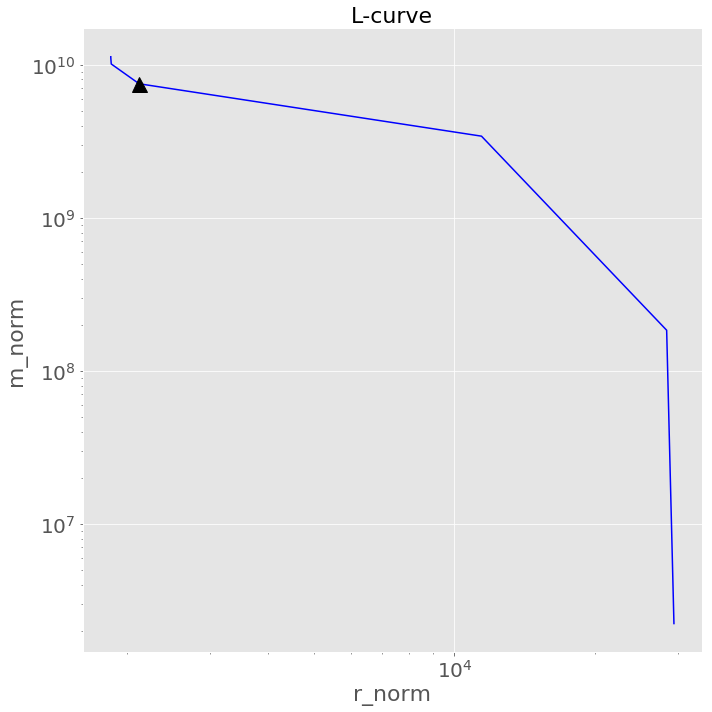

In [22]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.loglog(norm_r,norm_m, 'b-')
plt.plot(norm_r[3],norm_m[3], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Results

In [23]:
result_diorama['magnetic_moment'] = m_est
result_diorama['inc_est'] = incl_est
result_diorama['dec_est'] = decl_est
result_diorama['layer_depth'] = h
result_diorama['reg_parameter'] = mu_list
result_diorama['phi'] = phi_list

### Generating .pickle file

In [24]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_diorama['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [25]:
file_name = 'data/result_diorama.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_diorama, f)
    
saved_files.append(file_name)

### Saved files

In [26]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  data/result_diorama.pickle
